In [71]:
import pandas as pd
import os

# Especifica las rutas de los archivos CSV después de descomprimir
ruta_archivo_csv1 = 'C:/Users/Marcelo/Desktop/datapaises/GDP.csv'
ruta_archivo_csv2 = 'POP.csv'

# Carga cada archivo CSV en un DataFrame
df1 = pd.read_csv(ruta_archivo_csv1)
df2 = pd.read_csv(ruta_archivo_csv2)


df1 = df1.iloc[4:]
df2 = df2.iloc[4:]

# Restablece los índices del DataFrame después de la eliminación
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

print("Primeros registros del DataFrame 1:")
print(df1.head())

print("\nPrimeros registros del DataFrame 2:")
print(df2.head())


Primeros registros del DataFrame 1:
  Unnamed: 0 Gross domestic product 2022  Unnamed: 2     Unnamed: 3  \
0        USA                           1         NaN  United States   
1        CHN                           2         NaN          China   
2        JPN                           3         NaN          Japan   
3        DEU                           4         NaN        Germany   
4        IND                           5         NaN          India   

     Unnamed: 4 Unnamed: 5  
0   25,439,700         NaN  
1   17,963,171         NaN  
2    4,232,174         NaN  
3    4,082,469         NaN  
4    3,416,646         NaN  

Primeros registros del DataFrame 2:
  Unnamed: 0 Population 2022  Unnamed: 2     Unnamed: 3   Unnamed: 4  \
0        IND               1         NaN          India   1,417,173    
1        CHN               2         NaN          China   1,412,175    
2        USA               3         NaN  United States     333,288    
3        IDN               4         N

In [72]:
# Lista de nombres de las columnas que deseas eliminar
columnas_a_eliminar1 = ['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 5', 'Gross domestic product 2022']
columnas_a_eliminar2 = ['Unnamed: 2', 'Unnamed: 5', 'Unnamed: 0', 'Population 2022' ]


# Utiliza el método drop para eliminar las columnas
df1 = df1.drop(columnas_a_eliminar1, axis=1)
df2 = df2.drop(columnas_a_eliminar2, axis=1)

# Restablece los índices del DataFrame después de la eliminación
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

df1 = df1.rename(columns={'Unnamed: 3': 'Pais'})
df1 = df1.rename(columns={'Unnamed: 4': 'GDP'})

df2 = df2.rename(columns={'Unnamed: 3': 'Pais'})
df2 = df2.rename(columns={'Unnamed: 4': 'Population'})



# Visualiza los primeros registros de cada DataFrame

print("Primeros registros del DataFrame 1:")
print(df1.head(20))

print("\nPrimeros registros del DataFrame 2:")
print(df2.head(20))


Primeros registros del DataFrame 1:
                  Pais           GDP
0        United States   25,439,700 
1                China   17,963,171 
2                Japan    4,232,174 
3              Germany    4,082,469 
4                India    3,416,646 
5       United Kingdom    3,089,073 
6               France    2,779,092 
7   Russian Federation    2,240,422 
8               Canada    2,137,939 
9                Italy    2,049,737 
10              Brazil    1,920,096 
11           Australia    1,692,957 
12         Korea, Rep.    1,673,916 
13              Mexico    1,465,854 
14               Spain    1,417,800 
15           Indonesia    1,319,100 
16        Saudi Arabia    1,108,572 
17         Netherlands    1,009,399 
18             Türkiye      907,118 
19         Switzerland      818,427 

Primeros registros del DataFrame 2:
                  Pais   Population
0                India   1,417,173 
1                China   1,412,175 
2        United States     333,288 
3     

In [73]:
# Contar el número total de datos en cada DataFrame
total_datos_df1 = df1.shape[0]
total_datos_df2 = df2.shape[0]

# Visualiza el resultado
print("Número total de datos en el DataFrame 1:", total_datos_df1)
print("Número total de datos en el DataFrame 2:", total_datos_df2)

Número total de datos en el DataFrame 1: 325
Número total de datos en el DataFrame 2: 324


In [74]:
duplicates_df1 = df1[df1.duplicated(subset=['Pais'], keep=False)]
print("Duplicados en df1:\n", duplicates_df1)

# Verificar duplicados en df2
duplicates_df2 = df2[df2.duplicated(subset=['Pais'], keep=False)]
print("Duplicados en df2:\n", duplicates_df2)
df_final = pd.merge(df1, df2, on='Pais')

# Imprime el nuevo DataFrame combinado
print(df_final)

Duplicados en df1:
     Pais  GDP
217  NaN  NaN
218  NaN  NaN
219  NaN  NaN
221  NaN  NaN
222  NaN  NaN
..   ...  ...
320  NaN  NaN
321  NaN  NaN
322  NaN  NaN
323  NaN  NaN
324  NaN  NaN

[96 rows x 2 columns]
Duplicados en df2:
     Pais Population
217  NaN        NaN
218  NaN        NaN
220  NaN        NaN
232  NaN        NaN
233  NaN        NaN
..   ...        ...
319  NaN        NaN
320  NaN        NaN
321  NaN        NaN
322  NaN        NaN
323  NaN        NaN

[95 rows x 2 columns]
                     Pais           GDP   Population
0           United States   25,439,700      333,288 
1                   China   17,963,171    1,412,175 
2                   Japan    4,232,174      125,125 
3                 Germany    4,082,469       83,798 
4                   India    3,416,646    1,417,173 
...                   ...           ...          ...
9344   Sub-Saharan Africa    2,060,531    1,211,190 
9345           Low income      528,125      703,728 
9346  Lower middle income    

In [75]:
df_final = df_final.dropna()

df_final = df_final.iloc[:210]

# Imprimir el DataFrame resultante
print(df_final)


                 Pais           GDP   Population
0       United States   25,439,700      333,288 
1               China   17,963,171    1,412,175 
2               Japan    4,232,174      125,125 
3             Germany    4,082,469       83,798 
4               India    3,416,646    1,417,173 
..                ...           ...          ...
205  Marshall Islands          259           42 
206             Palau          233           18 
207          Kiribati          223          131 
208             Nauru          152           13 
209            Tuvalu           59           11 

[210 rows x 3 columns]


In [76]:
# Convertir las columnas "GDP" y "Population" a numéricas
df_final['GDP'] = df_final['GDP'].replace('[\$,]', '', regex=True).astype(float)
df_final['Population'] = df_final['Population'].replace('[\$,]', '', regex=True).astype(float)

# Calcular el promedio y agregar una nueva columna
df_final['Promedio'] = (df_final['GDP'] + df_final['Population']) / 2

# Imprimir el DataFrame resultante
print(df_final)

                 Pais         GDP  Population    Promedio
0       United States  25439700.0    333288.0  12886494.0
1               China  17963171.0   1412175.0   9687673.0
2               Japan   4232174.0    125125.0   2178649.5
3             Germany   4082469.0     83798.0   2083133.5
4               India   3416646.0   1417173.0   2416909.5
..                ...         ...         ...         ...
205  Marshall Islands       259.0        42.0       150.5
206             Palau       233.0        18.0       125.5
207          Kiribati       223.0       131.0       177.0
208             Nauru       152.0        13.0        82.5
209            Tuvalu        59.0        11.0        35.0

[210 rows x 4 columns]


In [77]:
# Exportar el DataFrame como CSV
df_final.to_csv('C:/Users/Marcelo/Desktop/datapaises/data_limpia.csv', index=False)


In [50]:

# Ordenar por 'Population'
df_population_sorted = df_final.sort_values(by='Population',ascending=False)
print("Ordenado por Population:\n", df_population_sorted)

# Ordenar por 'GDP'
df_gdp_sorted = df_final.sort_values(by='GDP',ascending=False)
print("\nOrdenado por GDP:\n", df_gdp_sorted)

# Ordenar por 'Promedio'
df_promedio_sorted = df_final.sort_values(by='Promedio', ascending=False)
print("\nOrdenado por Promedio:\n", df_promedio_sorted)


Ordenado por Population:
                          Pais         GDP  Population    Promedio
4                       India   3416646.0   1417173.0   2416909.5
1                       China  17963171.0   1412175.0   9687673.0
0               United States  25439700.0    333288.0  12886494.0
15                  Indonesia   1319100.0    275501.0    797300.5
41                   Pakistan    374697.0    235825.0    305261.0
..                        ...         ...         ...         ...
186                San Marino      1855.0        34.0       944.5
200  St. Martin (French part)       649.0        32.0       340.5
206                     Palau       233.0        18.0       125.5
208                     Nauru       152.0        13.0        82.5
209                    Tuvalu        59.0        11.0        35.0

[210 rows x 4 columns]

Ordenado por GDP:
                  Pais         GDP  Population    Promedio
0       United States  25439700.0    333288.0  12886494.0
1               China 

In [87]:


diccionario_continentes = {
    'United States': 'América del Norte',
    'China': 'Asia',
    'Japan': 'Asia',
    'Germany': 'Europa',
    'India': 'Asia',
    'United Kingdom': 'Europa',
    'France': 'Europa',
    'Russian Federation': 'Europa',
    'Canada': 'América del Norte',
    'Italy': 'Europa',
    'Brazil': 'América del Sur',
    'Australia': 'Oceanía',
    'Korea, Rep.': 'Asia',
    'Mexico': 'América del Norte',
    'Spain': 'Europa',
    'Indonesia': 'Asia',
    'Saudi Arabia': 'Asia',
    'Netherlands': 'Europa',
    'Türkiye': 'Europa',
    'Switzerland': 'Europa',
    'Poland': 'Europa',
    'Cuba': 'América del Norte',
    'Argentina': 'América del Sur',
    'Sweden': 'Europa',
    'Belgium': 'Europa',
    'Norway': 'Europa',
    'Ireland': 'Europa',
    'Israel': 'Asia',
    'United Arab Emirates': 'Asia',
    'Thailand': 'Asia',
    'Egypt, Arab Rep.': 'África',
    'Nigeria': 'África',
    'Austria': 'Europa',
    'Singapore': 'Asia',
    'Bangladesh': 'Asia',
    'Iran, Islamic Rep.': 'Asia',
    'Viet Nam': 'Asia',
    'Malaysia': 'Asia',
    'South Africa': 'África',
    'Philippines': 'Asia',
    'Denmark': 'Europa',
    'Pakistan': 'Asia',
    'Hong Kong SAR, China': 'Asia',
    'Colombia': 'América del Sur',
    'Chile': 'América del Sur',
    'Romania': 'Europa',
    'Czech Republic': 'Europa',
    'Finland': 'Europa',
    'Iraq': 'Asia',
    'Portugal': 'Europa',
    'New Zealand': 'Oceanía',
    'Peru': 'América del Sur',
    'Qatar': 'Asia',
    'Kazakhstan': 'Asia',
    'Greece': 'Europa',
    'Algeria': 'África',
    'Hungary': 'Europa',
    'Kuwait': 'Asia',
    'Ukraine': 'Europa',
    'Morocco': 'África',
    'Ethiopia': 'África',
    'Slovak Republic': 'Europa',
    'Ecuador': 'América del Sur',
    'Oman': 'Asia',
    'Dominican Republic': 'América del Norte',
    'Puerto Rico': 'América del Norte',
    'Kenya': 'África',
    'Angola': 'África',
    'Guatemala': 'América del Norte',
    'Bulgaria': 'Europa',
    'Luxembourg': 'Europa',
    'Uzbekistan': 'Asia',
    'Azerbaijan': 'Asia',
    'Panama': 'América del Norte',
    'Tanzania': 'África',
    'Sri Lanka': 'Asia',
    'Ghana': 'África',
    'Belarus': 'Europa',
    'Croatia': 'Europa',
    'Uruguay': 'América del Sur',
    'Lithuania': 'Europa',
    "Côte d'Ivoire": 'África',
    'Costa Rica': 'América del Norte',
    'Congo, Dem. Rep.': 'África',
    'Serbia': 'Europa',
    'Myanmar': 'Asia',
    'Slovenia': 'Europa',
    'Turkmenistan': 'Asia',
    'Sudan': 'África',
    'Jordan': 'Asia',
    'Tunisia': 'África',
    'Libya': 'África',
    'Uganda': 'África',
    'Bahrain': 'Asia',
    'Bolivia': 'América del Sur',
    'Cameroon': 'África',
    'Paraguay': 'América del Sur',
    'Latvia': 'Europa',
    'Nepal': 'Asia',
    'Estonia': 'Europa',
    'El Salvador': 'América del Norte',
    'Honduras': 'América del Norte',
    'Papua New Guinea': 'Oceanía',
    'Trinidad and Tobago': 'América del Norte',
    'Cambodia': 'Asia',
    'Cyprus': 'Europa',
    'Zambia': 'África',
    'Iceland': 'Europa',
    'Senegal': 'África',
    'Zimbabwe': 'África',
    'Georgia': 'Europa',
    'Bosnia and Herzegovina': 'Europa',
    'Macao SAR, China': 'Asia',
    'Lebanon': 'Asia',
    'Gabon': 'África',
    'Guinea': 'África',
    'Botswana': 'África',
    'Haiti': 'América del Norte',
    'Armenia': 'Europa',
    'West Bank and Gaza': 'Asia',
    'Albania': 'Europa',
    'Mali': 'África',
    'Burkina Faso': 'África',
    'Mozambique': 'África',
    'Malta': 'Europa',
    'Benin': 'África',
    'Mongolia': 'Asia',
    'Jamaica': 'América del Norte',
    'Brunei Darussalam': 'Asia',
    'Congo, Rep.': 'África',
    'Nicaragua': 'América del Norte',
    'Lao PDR': 'Asia',
    'Niger': 'África',
    'Madagascar': 'África',
    'Guyana': 'América del Sur',
    'Moldova': 'Europa',
    'Afghanistan': 'Asia',
    'North Macedonia': 'Europa',
    'Rwanda': 'África',
    'Malawi': 'África',
    'Mauritius': 'África',
    'Namibia': 'África',
    'Bahamas, The': 'América del Norte',
    'Chad': 'África',
    'Equatorial Guinea': 'África',
    'Channel Islands': 'Europa',
    'Kyrgyz Republic': 'Asia',
    'Tajikistan': 'Asia',
    'Somalia': 'África',
    'Mauritania': 'África',
    'New Caledonia': 'Oceanía',
    'Kosovo': 'Europa',
    'Syrian Arab Republic': 'Asia',
    'Monaco': 'Europa',
    'Togo': 'África',
    'Liechtenstein': 'Europa',
    'Bermuda': 'América del Norte',
    'Cayman Islands': 'América del Norte',
    'Isle of Man': 'Europa',
    'Montenegro': 'Europa',
    'Maldives': 'Asia',
    'Guam': 'Oceanía',
    'French Polynesia': 'Oceanía',
    'Barbados': 'América del Norte',
    'Fiji': 'Oceanía',
    'Eswatini': 'África',
    'Virgin Islands (U.S.)': 'América del Norte',
    'Sierra Leone': 'África',
    'Liberia': 'África',
    'Suriname': 'América del Sur',
    'Faroe Islands': 'Europa',
    'Aruba': 'América del Norte',
    'Djibouti': 'África',
    'Andorra': 'Europa',
    'Burundi': 'África',
    'Greenland': 'Europa',
    'Timor-Leste': 'Asia',
    'Curaçao': 'América del Norte',
    'Belize': 'América del Norte',
    'Bhutan': 'Asia',
    'Central African Republic': 'África',
    'St. Lucia': 'África',
    'Lesotho': 'África',
    'Cabo Verde': 'África',
    'Gambia, The': 'África',
    'Antigua and Barbuda': 'América del Norte',
    'San Marino': 'Europa',
    'Guinea-Bissau': 'África',
    'Solomon Islands': 'Oceanía',
    'Seychelles': 'África',
    'Sint Maarten (Dutch part)': 'América del Norte',
    'Comoros': 'África',
    'Grenada': 'América del Norte',
    'Turks and Caicos Islands': 'América del Norte',
    'Vanuatu': 'Oceanía',
    'St. Kitts and Nevis': 'América del Norte',
    'St. Vincent and the Grenadines': 'América del Norte',
    'American Samoa': 'Oceanía',
    'Northern Mariana Islands': 'Oceanía',
    'Samoa': 'Oceanía',
    'St. Martin (French part)': 'América del Norte',
    'Dominica': 'América del Norte',
    'São Tomé and Principe': 'África',
    'Tonga': 'Oceanía',
    'Micronesia, Fed. Sts.': 'Oceanía',
    'Marshall Islands': 'Oceanía',
    'Palau': 'Oceanía',
    'Kiribati': 'Oceanía',
    'Nauru': 'Oceanía',
    'Tuvalu': 'Oceanía',
}



# Agregar la columna de continentes a df_final
df_final['Continente'] = df_final['Pais'].map(diccionario_continentes)



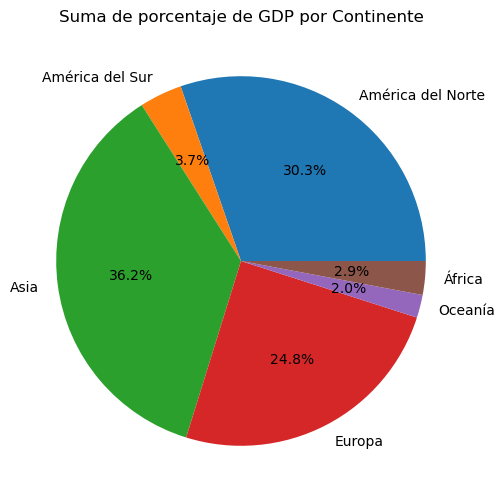

In [88]:
import matplotlib.pyplot as plt

# Calcular porcentajes por continente
df_final['Population_percentage'] = (df_final['Population'] / df_final['Population'].sum()) * 100
df_final['GDP_percentage'] = (df_final['GDP'] / df_final['GDP'].sum()) * 100


# Gráfico de torta para la suma de porcentaje de GDP por continente
plt.figure(figsize=(12, 6))
gdp_pie = df_final.groupby('Continente')['GDP_percentage'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Suma de porcentaje de GDP por Continente')
plt.ylabel('')

plt.savefig('gdp_perc_cont.png')
plt.show()


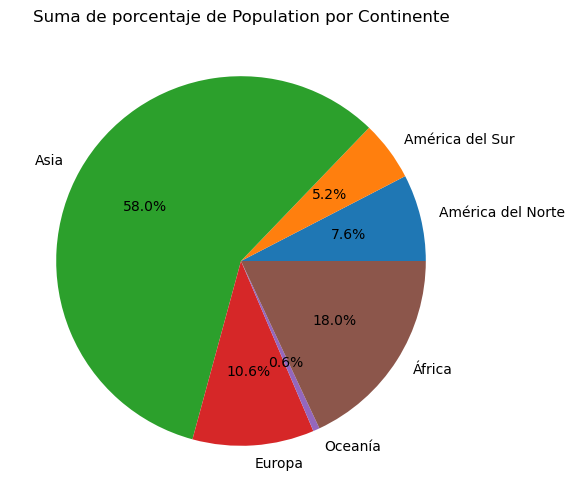

In [89]:
# Gráfico de torta para la suma de porcentaje de Population por continente
plt.figure(figsize=(12, 6))
population_pie = df_final.groupby('Continente')['Population_percentage'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Suma de porcentaje de Population por Continente')
plt.ylabel('')


plt.savefig('pop_perc_cont.png')
plt.show()



<Figure size 1200x600 with 0 Axes>

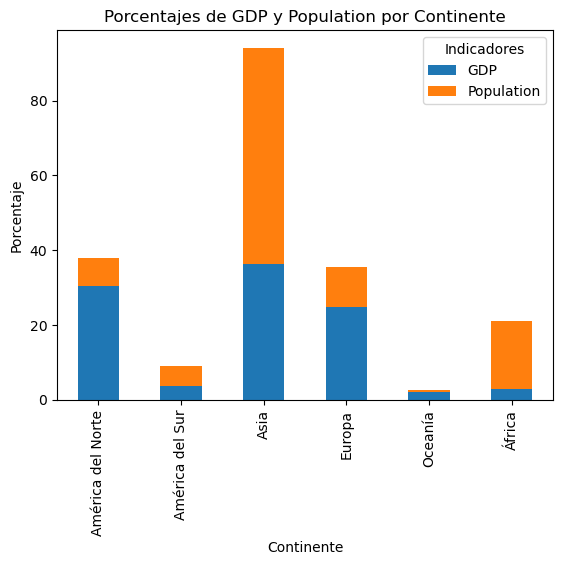

<Figure size 640x480 with 0 Axes>

In [90]:
import matplotlib.pyplot as plt

# Calcular porcentajes por continente
df_final['Population_percentage'] = (df_final['Population'] / df_final['Population'].sum()) * 100
df_final['GDP_percentage'] = (df_final['GDP'] / df_final['GDP'].sum()) * 100

# Combina las series de porcentajes de GDP y Population
combined_percentages = df_final.groupby('Continente')[['GDP_percentage', 'Population_percentage']].sum()

# Gráfico de barras apiladas para porcentajes de GDP y Population por continente
plt.figure(figsize=(12, 6))
combined_percentages.plot(kind='bar', stacked=True)
plt.title('Porcentajes de GDP y Population por Continente')
plt.xlabel('Continente')
plt.ylabel('Porcentaje')
plt.legend(title='Indicadores', labels=['GDP', 'Population'], loc='upper right')
plt.show()


plt.savefig('barras.png')

In [133]:

import pandas as pd

# Ruta del directorio
directorio = 'C:/Users/Marcelo/Desktop/datapaises/'

# Recorremos los continentes
for continente in continentes:
    data_cont = df_final[df_final['Continente'] == continente]
    
    # Ordenar por población y GDP
    data_population = data_cont.sort_values(by='Population', ascending=False).head(5)
    data_gdp = data_cont.sort_values(by='GDP', ascending=False).head(5)
    
    # Agregar datos al DataFrame de resultados
    data_population['Continente'] = continente
    data_gdp['Continente'] = continente
    
    # Crear un DataFrame para mostrar y guardar como CSV
    df_population = pd.DataFrame(data_population, columns=['Pais', 'Population', 'Continente'])
    df_gdp = pd.DataFrame(data_gdp, columns=['Pais', 'GDP', 'Continente'])
    
    # Imprimir los datos
    print(f"Resultados Population en {continente}:\n{df_population}")
    print("\n")
    print(f"Resultados GDP en {continente}:\n{df_gdp}")
    print("\n")
    
    # Guardar DataFrames en archivos Excel en el directorio especificado
    df_population.to_excel(f'{directorio}resultados_population_{continente}.xlsx', index=False)
    df_gdp.to_excel(f'{directorio}resultados_gdp_{continente}.xlsx', index=False)


Resultados Population en América del Norte:
              Pais  Population         Continente
0    United States    333288.0  América del Norte
13          Mexico    127504.0  América del Norte
8           Canada     38930.0  América del Norte
68       Guatemala     17358.0  América del Norte
117          Haiti     11585.0  América del Norte


Resultados GDP en América del Norte:
                  Pais         GDP         Continente
0        United States  25439700.0  América del Norte
8               Canada   2137939.0  América del Norte
13              Mexico   1465854.0  América del Norte
21                Cuba    633442.0  América del Norte
64  Dominican Republic    113537.0  América del Norte


Resultados Population en Asia:
          Pais  Population Continente
4        India   1417173.0       Asia
1        China   1412175.0       Asia
15   Indonesia    275501.0       Asia
41    Pakistan    235825.0       Asia
34  Bangladesh    171186.0       Asia


Resultados GDP en Asia:
      